## Histogramas
Estos sirven para saber como estan distribuidos los datos de nuestra data
Y saber hacia donde estan cargados los datos
Para realizar esto solo hay que hacer:
df['columna'].hist(bins=20)
plt.show

pero tambien se pueden definir filtros dentros de las columnas
filtro=df-loc[]
df.loc[filtro,''Columna'].hist(bins=,edgecolor='')
plt.show

numeros de bins=(max-min)/numero de etiquetas

## Box plot
Resume distribución de balores de una muestra, este muestra
-Minimo
-maximo
-mediana
-q1
-q3
para graficar varias boxplot, se hacen los filtros correspondientes por la clase que se desee y luego se le agregan al boxplor
plt.boxplot([filtro1,filtro2,....,filtroN],labels=['1','2',...,'N'])

entre mas cerca esten los outlayers más facil de clasificar es la clase

### Ejercicio


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [ ]:
archivo='/Users/matiasinostrozacifuentes/Desktop/python_intro/DataScience_Unilever/Semana_3/Data/notas-genero.xlsx'
data_ejercicio=pd.read_excel(archivo)
data_ejercicio

,Nombre,Nota,Genero
0,SEBASTI√ÅN ISRAEL,79,M
1,DANIEL ANTONIO,67,M
2,CRISTIAN ALBERTO,78,M
3,MAR√çA GABRIELA,54,F
4,JOS√â ANTONIO,79,M
5,BRAYAN ANDR√âS,75,M
6,TOM√ÅS FERNANDO,68,M
7,CHRISTIAN GABRIEL,76,M
8,LUIS FELIPE,78,M
9,OSCAR IGNACIO,57,M


In [ ]:
graf_notas=data_ejercicio.groupby('Nota')['Nota'].count()

Generando el histograma y el gráfico de barras

In [ ]:
data_ejercicio['Nota'].std()

14.716770479060049

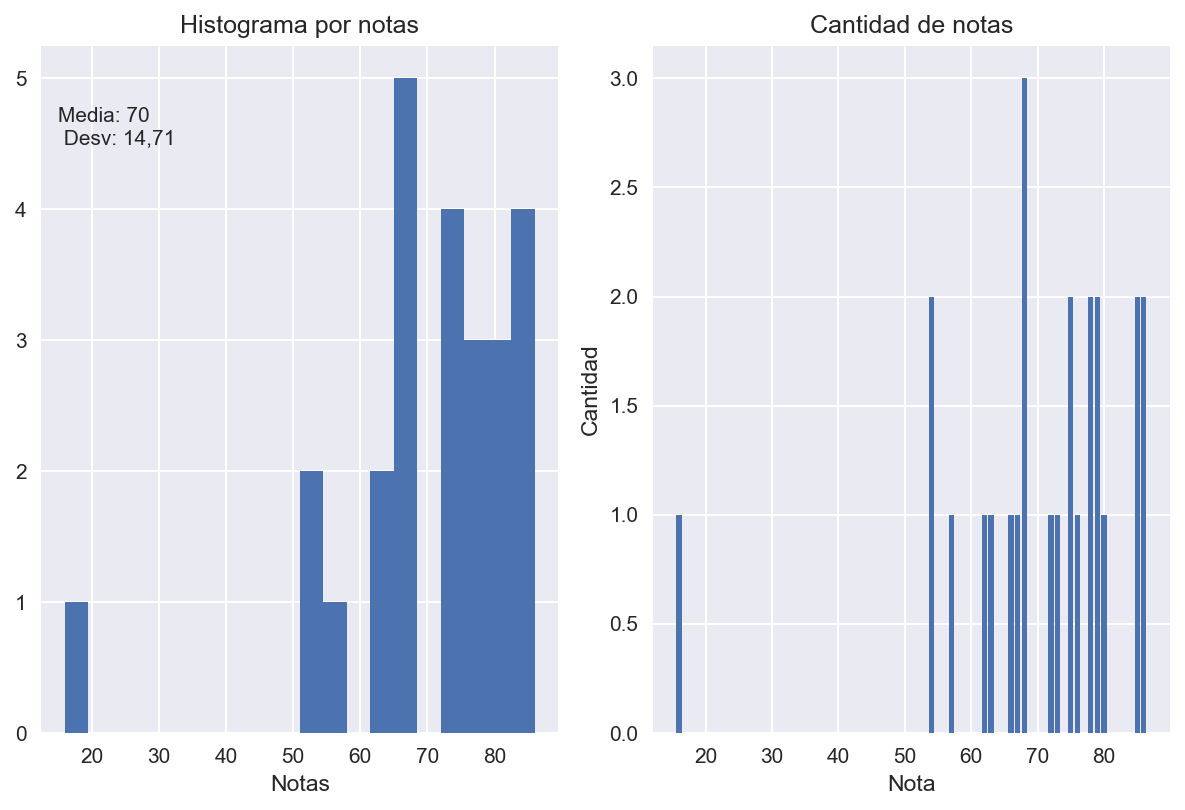

In [ ]:
fig = plt.figure(dpi=150)
ax1 = fig.add_subplot(1,2,1)
ax1=data_ejercicio['Nota'].hist(bins=20)
ax1.text(15,4.5,'Media: 70 \n Desv: 14,71')
ax1.set_xlabel('Notas')
ax1.set_title('Histograma por notas')

ax2=fig.add_subplot(1,2,2)
ax2.bar(graf_notas.index, graf_notas.values)
ax2.set_xlabel("Nota")
ax2.set_ylabel("Cantidad")
ax2.set_title("Cantidad de notas")
fig.tight_layout()
plt.show()

In [ ]:
filtro2=data_ejercicio.loc[data_ejercicio['Nota']<=60,:]
Reprobados=filtro2.groupby('Genero')['Genero'].count()

In [ ]:
filtro1=data_ejercicio.loc[data_ejercicio['Nota']>60,:]
aprobados=filtro1.groupby('Genero')['Nota'].count()

In [ ]:
aprobados.values

array([ 3, 18])

In [ ]:
Reprobados.values

array([2, 2])

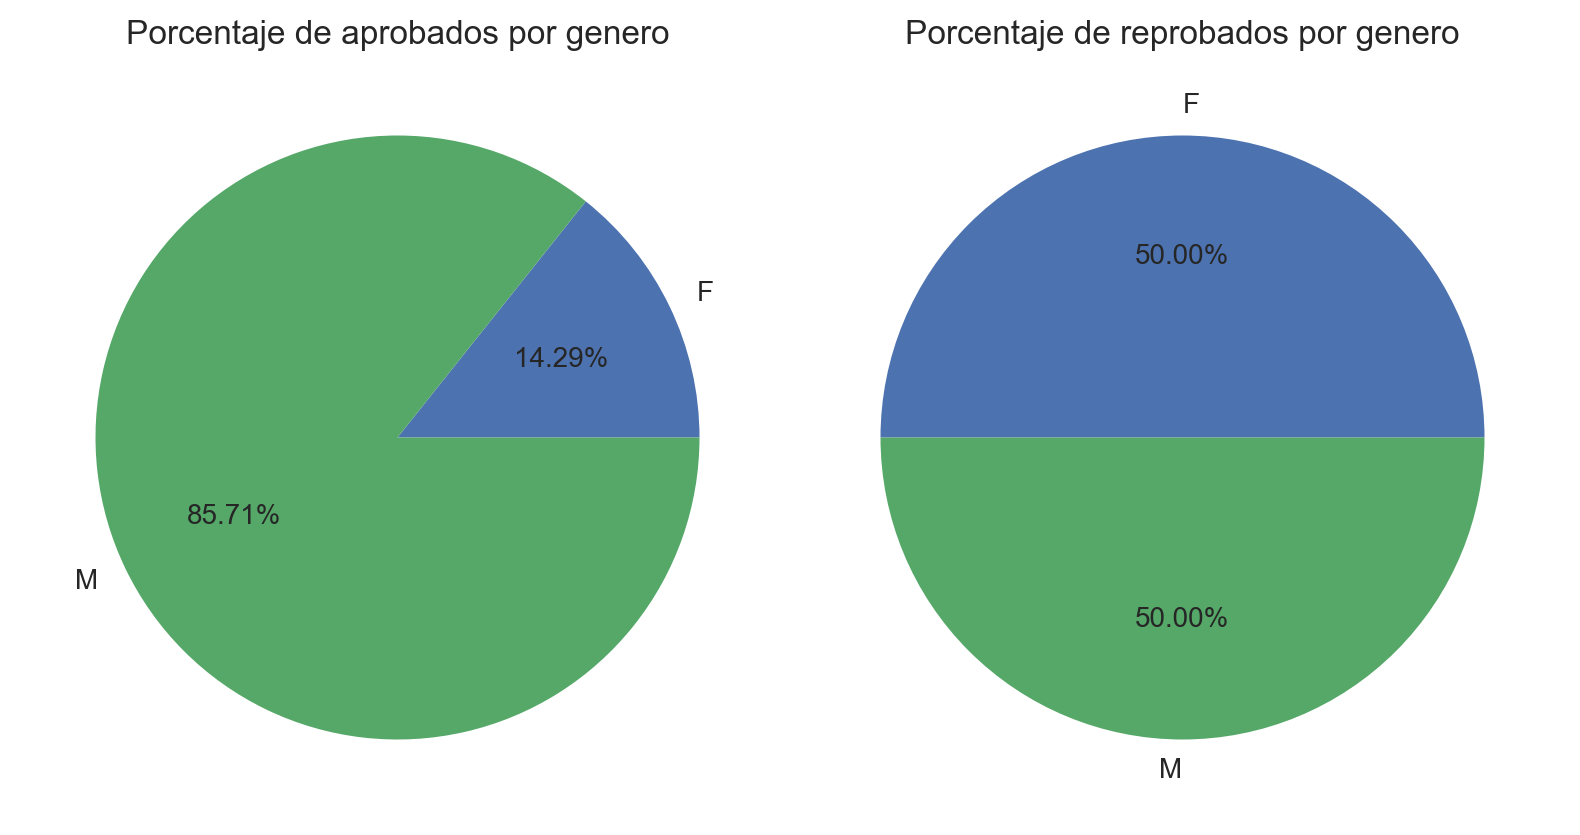

In [ ]:
fig = plt.figure(dpi=200)
ax1 = fig.add_subplot(1,2,1)
ax1.pie(aprobados.values,labels=aprobados.index,autopct="%.2f%%")
ax1.set_title("Porcentaje de aprobados por genero")

ax2=fig.add_subplot(1,2,2)
ax2.pie(Reprobados.values,labels=Reprobados.index,autopct="%.2f%%")
ax2.set_title("Porcentaje de reprobados por genero")
fig.tight_layout()


## Ejercicio
Cargue el archivo unicorn-companies.csv , en el encontramos la información relevante de las Startups convertidas en Unicornios, como nombre, inversores, pais, año de aparición, etc. Realice lo siguiente (preocúpese de la estética):
        Realice la limpieza de la data, su último recurso debe ser el Drop de datos
        Como es la distribución de las columnas categoricas?
        Como es la distribución de las columnas numericas?
        La cantidad de unicornios fundados a traves del tiempo
        Cómo ha cambiado con el tiempo la cantidad de empresas que lograron el estatus de unicornio (por país e industria)
        ¿Qué países tienen las valoraciones más altas de unicornios?
        ¿Qué industrias tienen la valoración más alta de unicornios?
        ¿Qué empresas han recaudado la mayor cantidad de dinero?
        ¿Cómo afecta el recuento de inversores a la valoración?

Importando librerias

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px

Cargando datos

In [ ]:
archivo='/Users/matiasinostrozacifuentes/Desktop/python_intro/DataScience_Unilever/Semana_4/Data/Unicorn_Companies.csv'
data_unicornio=pd.read_csv(archivo)

Previsualización de la data

In [ ]:
data_unicornio

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits
0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2012,$7.44B,IPO,28,8,5
1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002,$6.874B,None,29,12,None
2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2010,$2.901B,Asset,39,12,1
3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2005,$3.472B,Acquired,56,13,1
4,Epic Games,$42,10/26/2018,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",1991,$4.377B,Acquired,25,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,Timescale,$1,2/22/2022,United States,New York,Internet software & services,"New Enterprise Associates, Benchmark, Two Sigm...",2015,$181.06M,None,7,2,None
1033,Scalapay,$1,2/23/2022,Italy,Milan,Fintech,"Fasanara Capital, Tiger Global Management, Bal...",2019,$700M,None,10,2,None
1034,Omada Health,$1,2/23/2022,United States,San Francisco,Health,"U.S. Venture Partners, dRx Capital, Andreessen...",2011,$449.72M,None,30,6,None
1035,BlueVoyant,$1,2/23/2022,United States,New York,Cybersecurity,"8VC, Liberty Strategic Capital, Eden Global Pa...",2017,$525.5M,None,6,2,None


Revisando la data

In [ ]:
data_unicornio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Company            1037 non-null   object
 1   Valuation ($B)     1037 non-null   object
 2   Date Joined        1037 non-null   object
 3   Country            1037 non-null   object
 4   City               1037 non-null   object
 5   Industry           1037 non-null   object
 6   Select Inverstors  1037 non-null   object
 7   Founded Year       1037 non-null   object
 8   Total Raised       1037 non-null   object
 9   Financial Stage    1037 non-null   object
 10  Investors Count    1037 non-null   object
 11  Deal Terms         1037 non-null   object
 12  Portfolio Exits    1037 non-null   object
dtypes: object(13)
memory usage: 105.4+ KB


No se ven archivos nulos pero si como none
además las fechas estan como objetos se convertiran a datetime
la valorización, el año fundado, el total raised, el investor count, deal term y portfolio exists son objetos, se convertiran a numeros

Convirtiendo las fechas a datetime

In [ ]:
data_unicornio['Date Joined'] = pd.to_datetime(data_unicornio['Date Joined'])

Busqueda de valores None

In [ ]:
for i in data_unicornio:
    x= 'None' in data_unicornio[i].values
    print(f'¿en la columna {i} existen none ? {x}')

¿en la columna Company existen none ? False
¿en la columna Valuation ($B) existen none ? False
¿en la columna Date Joined existen none ? False
¿en la columna Country existen none ? False
¿en la columna City existen none ? False
¿en la columna Industry existen none ? False
¿en la columna Select Inverstors existen none ? True
¿en la columna Founded Year existen none ? True
¿en la columna Total Raised existen none ? True
¿en la columna Financial Stage existen none ? True
¿en la columna Investors Count existen none ? True
¿en la columna Deal Terms existen none ? True
¿en la columna Portfolio Exits existen none ? True


/var/folders/6y/9fksy1pj1bnbf51v6nyzx6fc0000gn/T/ipykernel_6617/1750732649.py:2: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



Cambiando los none en las columnas numericas por el valor 0
pero en total raised no se puede debido a que explican que son valores en distintos tipos de orden de miles
Founded year no sería adecuado rellenar debido a que es independiente de otros datos ( se puede dropear)
Select investors no se considera como complicado debido a que significa que no hay inversores
Financial stage indica un estado propio de cada compañia
por lo que solo hay que cambiar en:
investors count
deal terms
portfolio exists 
y este none significa un 0

In [ ]:
data_unicornio["Investors Count"]=data_unicornio["Investors Count"].replace("None",0)
data_unicornio['Investors Count']=pd.to_numeric(data_unicornio['Investors Count'],errors='coerce')
data_unicornio["Deal Terms"]=data_unicornio["Deal Terms"].replace("None",0)
data_unicornio['Deal Terms']=pd.to_numeric(data_unicornio['Deal Terms'],errors='coerce')
data_unicornio["Portfolio Exits"]=data_unicornio["Portfolio Exits"].replace("None",0)
data_unicornio['Portfolio Exits']=pd.to_numeric(data_unicornio['Portfolio Exits'],errors='coerce')


In [ ]:
data_unicornio

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits
0,Bytedance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2012,$7.44B,IPO,28,8,5
1,SpaceX,$100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002,$6.874B,None,29,12,0
2,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2010,$2.901B,Asset,39,12,1
3,Klarna,$45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2005,$3.472B,Acquired,56,13,1
4,Epic Games,$42,2018-10-26,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",1991,$4.377B,Acquired,25,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,Timescale,$1,2022-02-22,United States,New York,Internet software & services,"New Enterprise Associates, Benchmark, Two Sigm...",2015,$181.06M,None,7,2,0
1033,Scalapay,$1,2022-02-23,Italy,Milan,Fintech,"Fasanara Capital, Tiger Global Management, Bal...",2019,$700M,None,10,2,0
1034,Omada Health,$1,2022-02-23,United States,San Francisco,Health,"U.S. Venture Partners, dRx Capital, Andreessen...",2011,$449.72M,None,30,6,0
1035,BlueVoyant,$1,2022-02-23,United States,New York,Cybersecurity,"8VC, Liberty Strategic Capital, Eden Global Pa...",2017,$525.5M,None,6,2,0


In [ ]:
data_unicornio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Company            1037 non-null   object        
 1   Valuation ($B)     1037 non-null   object        
 2   Date Joined        1037 non-null   datetime64[ns]
 3   Country            1037 non-null   object        
 4   City               1037 non-null   object        
 5   Industry           1037 non-null   object        
 6   Select Inverstors  1037 non-null   object        
 7   Founded Year       1037 non-null   object        
 8   Total Raised       1037 non-null   object        
 9   Financial Stage    1037 non-null   object        
 10  Investors Count    1037 non-null   int64         
 11  Deal Terms         1037 non-null   int64         
 12  Portfolio Exits    1037 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(9)
memory usage: 105.4+ 

Quitando texto en valores numericos

In [ ]:
data_unicornio["Valuation ($B)"]=data_unicornio["Valuation ($B)"].str.replace("$","")
data_unicornio['Valuation ($B)']=pd.to_numeric(data_unicornio['Valuation ($B)'],errors='coerce')


/var/folders/6y/9fksy1pj1bnbf51v6nyzx6fc0000gn/T/ipykernel_6617/250483030.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [ ]:
data_unicornio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Company            1037 non-null   object        
 1   Valuation ($B)     1037 non-null   float64       
 2   Date Joined        1037 non-null   datetime64[ns]
 3   Country            1037 non-null   object        
 4   City               1037 non-null   object        
 5   Industry           1037 non-null   object        
 6   Select Inverstors  1037 non-null   object        
 7   Founded Year       1037 non-null   object        
 8   Total Raised       1037 non-null   object        
 9   Financial Stage    1037 non-null   object        
 10  Investors Count    1037 non-null   int64         
 11  Deal Terms         1037 non-null   int64         
 12  Portfolio Exits    1037 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(8)
memory us

Ya lista la data, se procede a generar gráficos
1 como se distribuyen las columnas categoricas?
para esto se van a realizar algunos gráficos que permitan saber como se comportan

In [ ]:
dist_Company=data_unicornio['Company'].value_counts()
dist_country=data_unicornio['Country'].value_counts()
dist_city=data_unicornio['City'].value_counts()
dist_industry=data_unicornio['Industry'].value_counts()
dist_FinancialStage=data_unicornio['Financial Stage'].value_counts()

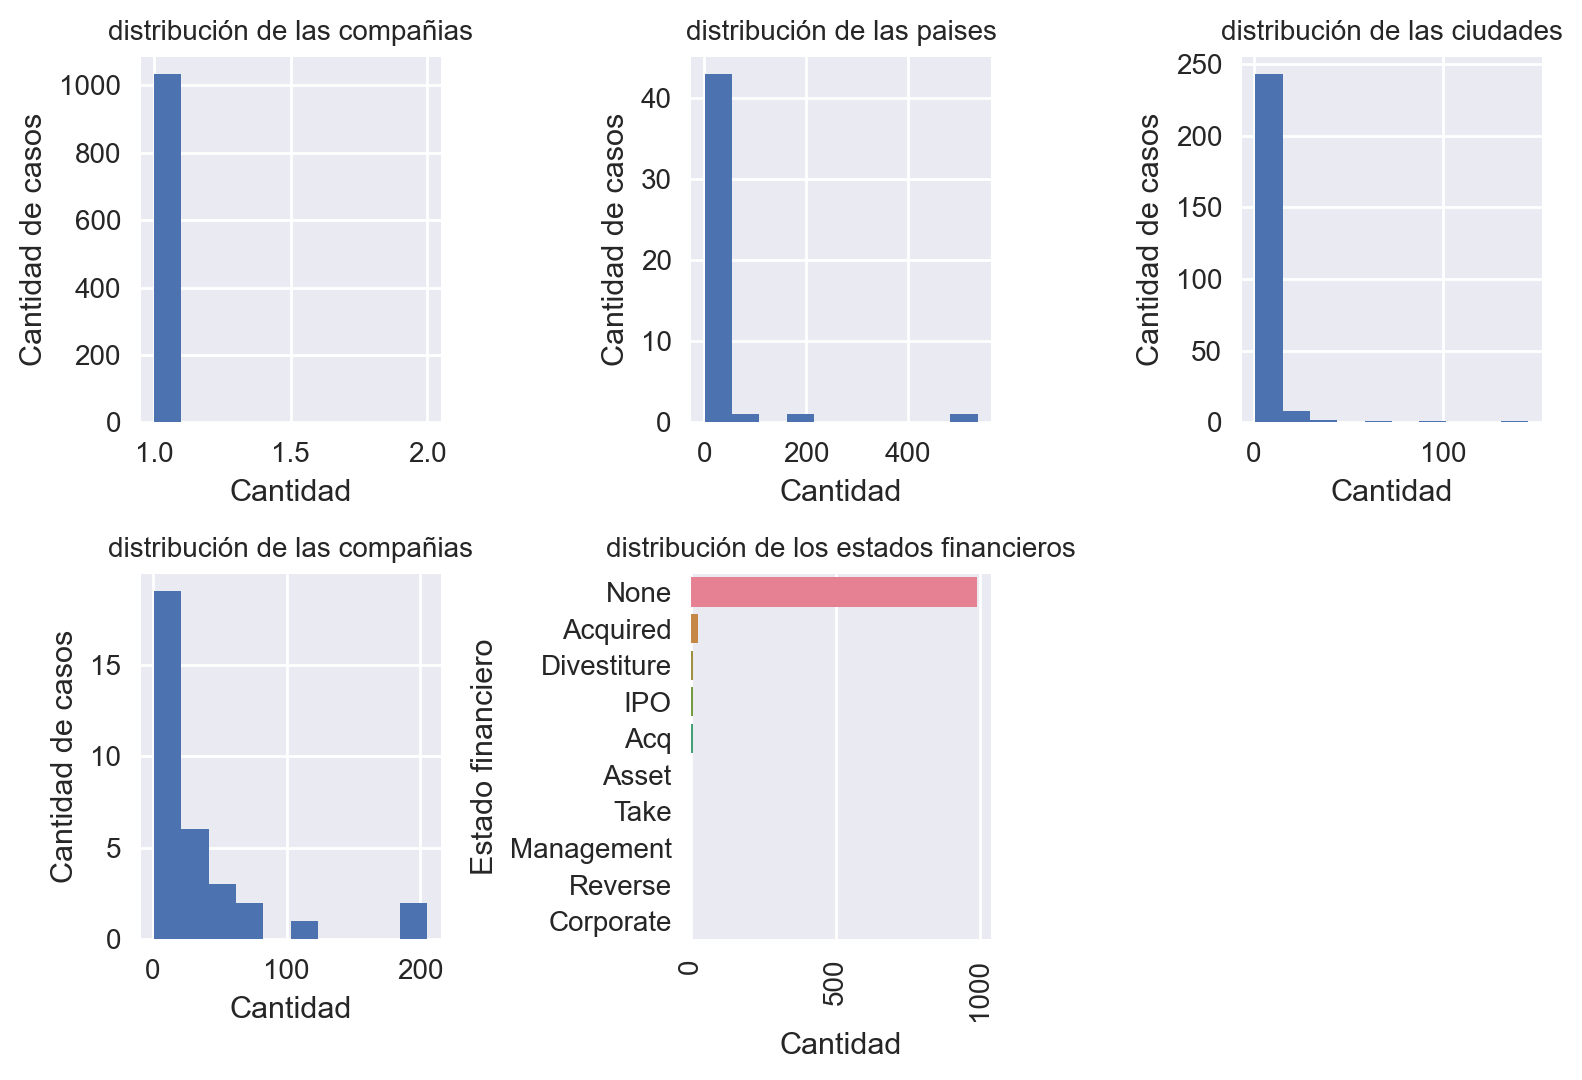

In [ ]:
#figura 1
fig = plt.figure(dpi=200)
 #para ajustar los gráficos
plt.style.use('seaborn')
ax1 = fig.add_subplot(2,3,1)
ax1=dist_Company.hist()
ax1.set_xlabel('Cantidad')
ax1.set_ylabel('Cantidad de casos')
ax1.set_title('distribución de las compañias',fontsize=10)


ax2 = fig.add_subplot(2,3,2)
ax2=dist_country.hist()
ax2.set_xlabel('Cantidad')
ax2.set_ylabel('Cantidad de casos')
ax2.set_title('distribución de las paises',fontsize=10)

ax3 = fig.add_subplot(2,3,3)
ax3=dist_city.hist()
ax3.set_xlabel('Cantidad')
ax3.set_ylabel('Cantidad de casos')
ax3.set_title('distribución de las ciudades',fontsize=10)

ax4 = fig.add_subplot(2,3,4)
ax4=dist_industry.hist()
ax4.set_xlabel('Cantidad')
ax4.set_ylabel('Cantidad de casos')
ax4.set_title('distribución de las compañias',fontsize=10)

ax5 = fig.add_subplot(2,3,5)
ax5=sns.barplot(x=dist_FinancialStage.values,y=dist_FinancialStage.index,palette='husl')
ax5.set_xlabel('Cantidad')
ax5.set_ylabel('Estado financiero')
ax5.set_title('distribución de los estados financieros',fontsize=10)
plt.xticks(rotation=90)

fig.tight_layout()





Revisando los distribución de los casos numericos

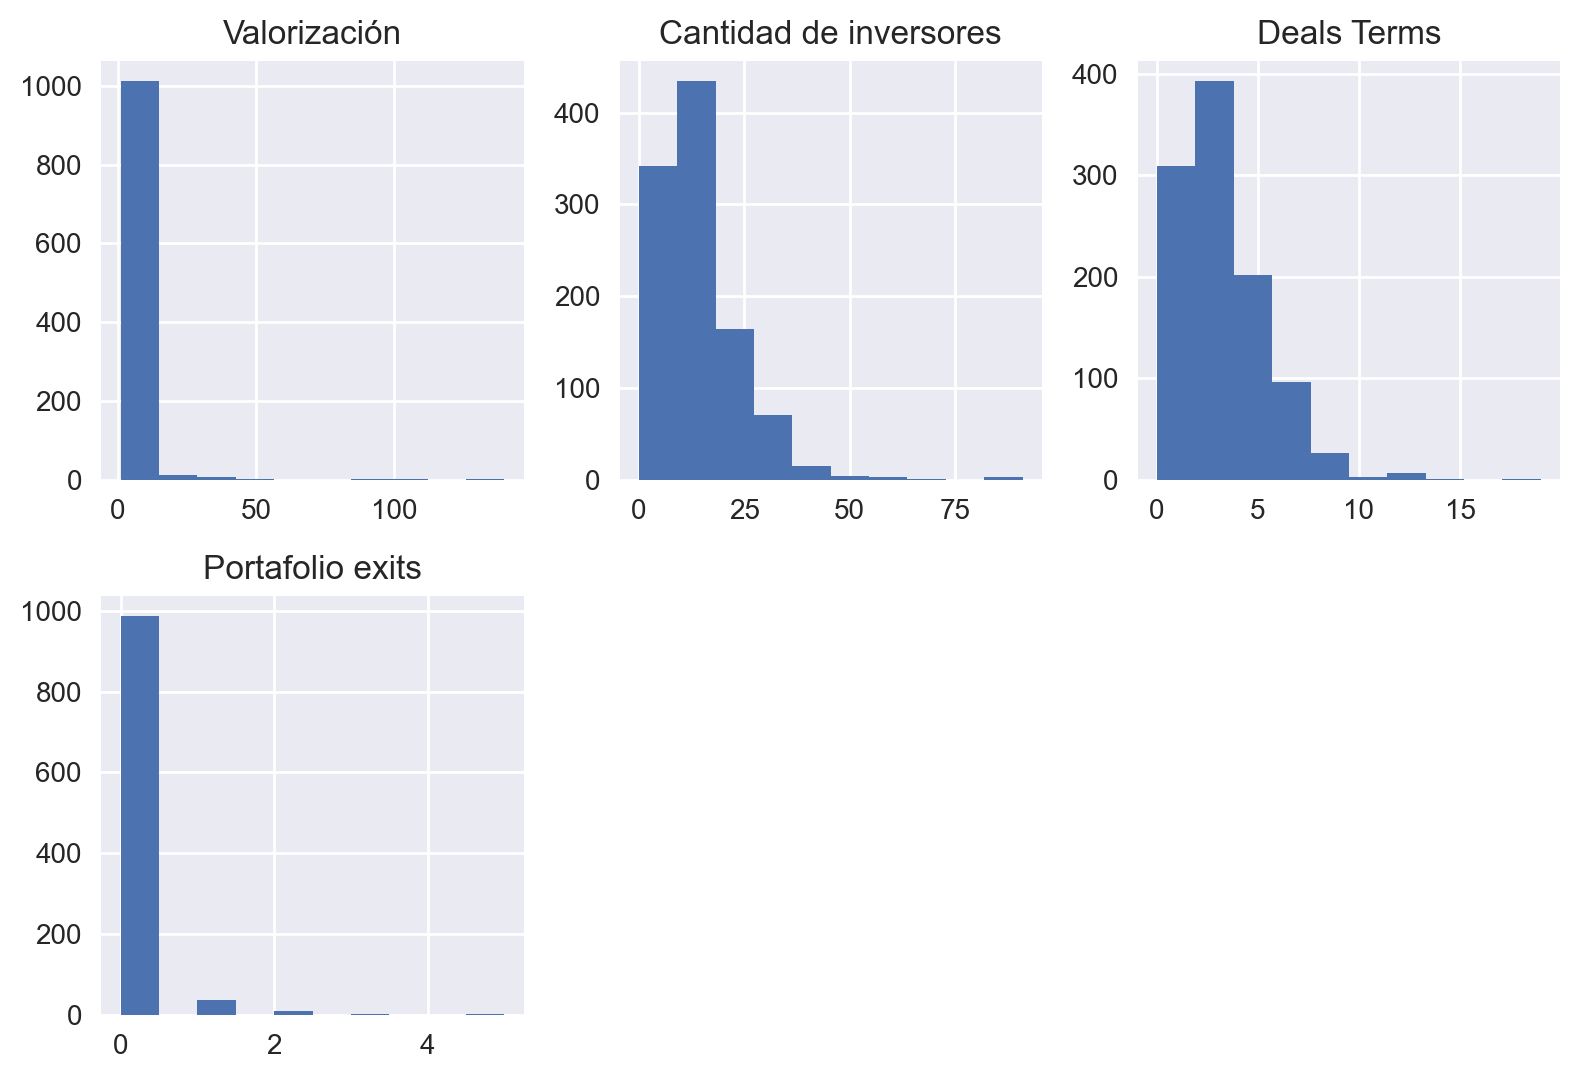

In [ ]:
#figura 1
fig = plt.figure(dpi=200)
 #para ajustar los gráficos
plt.style.use('seaborn')
ax1 = fig.add_subplot(2,3,1)
ax1=data_unicornio['Valuation ($B)'].hist()
ax1.set_title('Valorización')
ax2 = fig.add_subplot(2,3,2)
ax2=data_unicornio['Investors Count'].hist()
ax2.set_title('Cantidad de inversores')
ax3 = fig.add_subplot(2,3,3)
ax3=data_unicornio['Deal Terms'].hist()
ax3.set_title('Deals Terms')
ax4 = fig.add_subplot(2,3,4)
ax4=data_unicornio['Portfolio Exits'].hist()
ax4.set_title('Portafolio exits')


fig.tight_layout()


Cantidad de unicornios a traves del tiempo

Generando el groupby

In [ ]:
Atraves_Años=data_unicornio.groupby([data_unicornio['Date Joined'].dt.year])['Company'].count()
Atraves_Años

Date Joined
2007      1
2011      2
2012      4
2013      3
2014     13
2015     35
2016     21
2017     44
2018    103
2019    107
2020    107
2021    514
2022     83
Name: Company, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

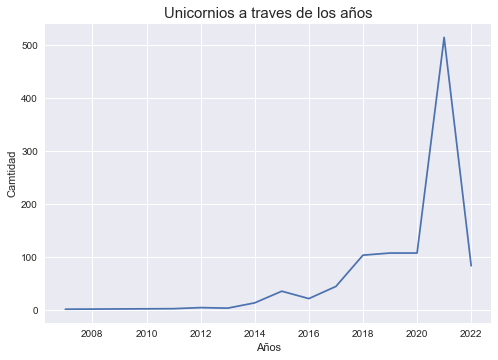

In [ ]:
Ax=sns.lineplot(x=Atraves_Años.index,y=Atraves_Años.values,palette='husl')
Ax.set_xlabel('Años')
Ax.set_ylabel('Camtidad')
Ax.set_title('Unicornios a traves de los años',fontsize=15)
plt.show

Variación por pais y por industria

In [ ]:
Grouppercountry=data_unicornio.groupby([data_unicornio['Date Joined'].dt.year,'Country'])[['Company']].count().reset_index()


In [ ]:
fig = px.line(Grouppercountry,
                 x='Date Joined',
                 y='Company',
                 color='Country',
                 labels=dict(x="Años", y="cantidades")
                )
fig.update_layout(showlegend=True,title_text='Variación de compañias a traves de los años por país')
fig.show()

NameError: ignored

Ahora por industria

In [ ]:
Groupperindustry=data_unicornio.groupby([data_unicornio['Date Joined'].dt.year,'Industry'])[['Company']].count().reset_index()

In [ ]:
fig = px.line(Groupperindustry,
                 x='Date Joined',
                 y='Company',
                 color='Industry',
                 labels=dict(x="Años", y="cantidades")
                )
fig.update_layout(showlegend=True,title_text='Variación de compañias a traves de los años por industria')
fig.show()

Valorizaciones por paises e industria

In [ ]:
data_unicornio.columns

Index(['Company', 'Valuation ($B)', 'Date Joined', 'Country', 'City',
       'Industry', 'Select Inverstors', 'Founded Year', 'Total Raised',
       'Financial Stage', 'Investors Count', 'Deal Terms', 'Portfolio Exits'],
      dtype='object')

In [ ]:
data_unicornio.groupby('Country')['Valuation ($B)'].sum().sort_values(ascending=False)

Country
United States           1829.74
China                    572.69
India                    187.05
United Kingdom           177.68
Germany                   66.70
Sweden                    60.52
Australia                 50.60
France                    49.87
Canada                    49.03
Israel                    38.42
Brazil                    36.98
Bahamas                   32.00
Indonesia                 30.90
South Korea               27.12
Netherlands               19.80
Hong Kong                 18.35
Singapore                 17.55
Mexico                    16.40
Turkey                    11.47
Estonia                    9.90
Ireland                    9.05
Belgium                    8.95
Japan                      8.82
Finland                    8.70
Austria                    7.61
Switzerland                6.60
Colombia                   6.40
Denmark                    5.70
Vietnam                    5.27
Spain                      5.05
Norway                     4.70


<bound method Figure.tight_layout of <Figure size 1600x1100 with 2 Axes>>

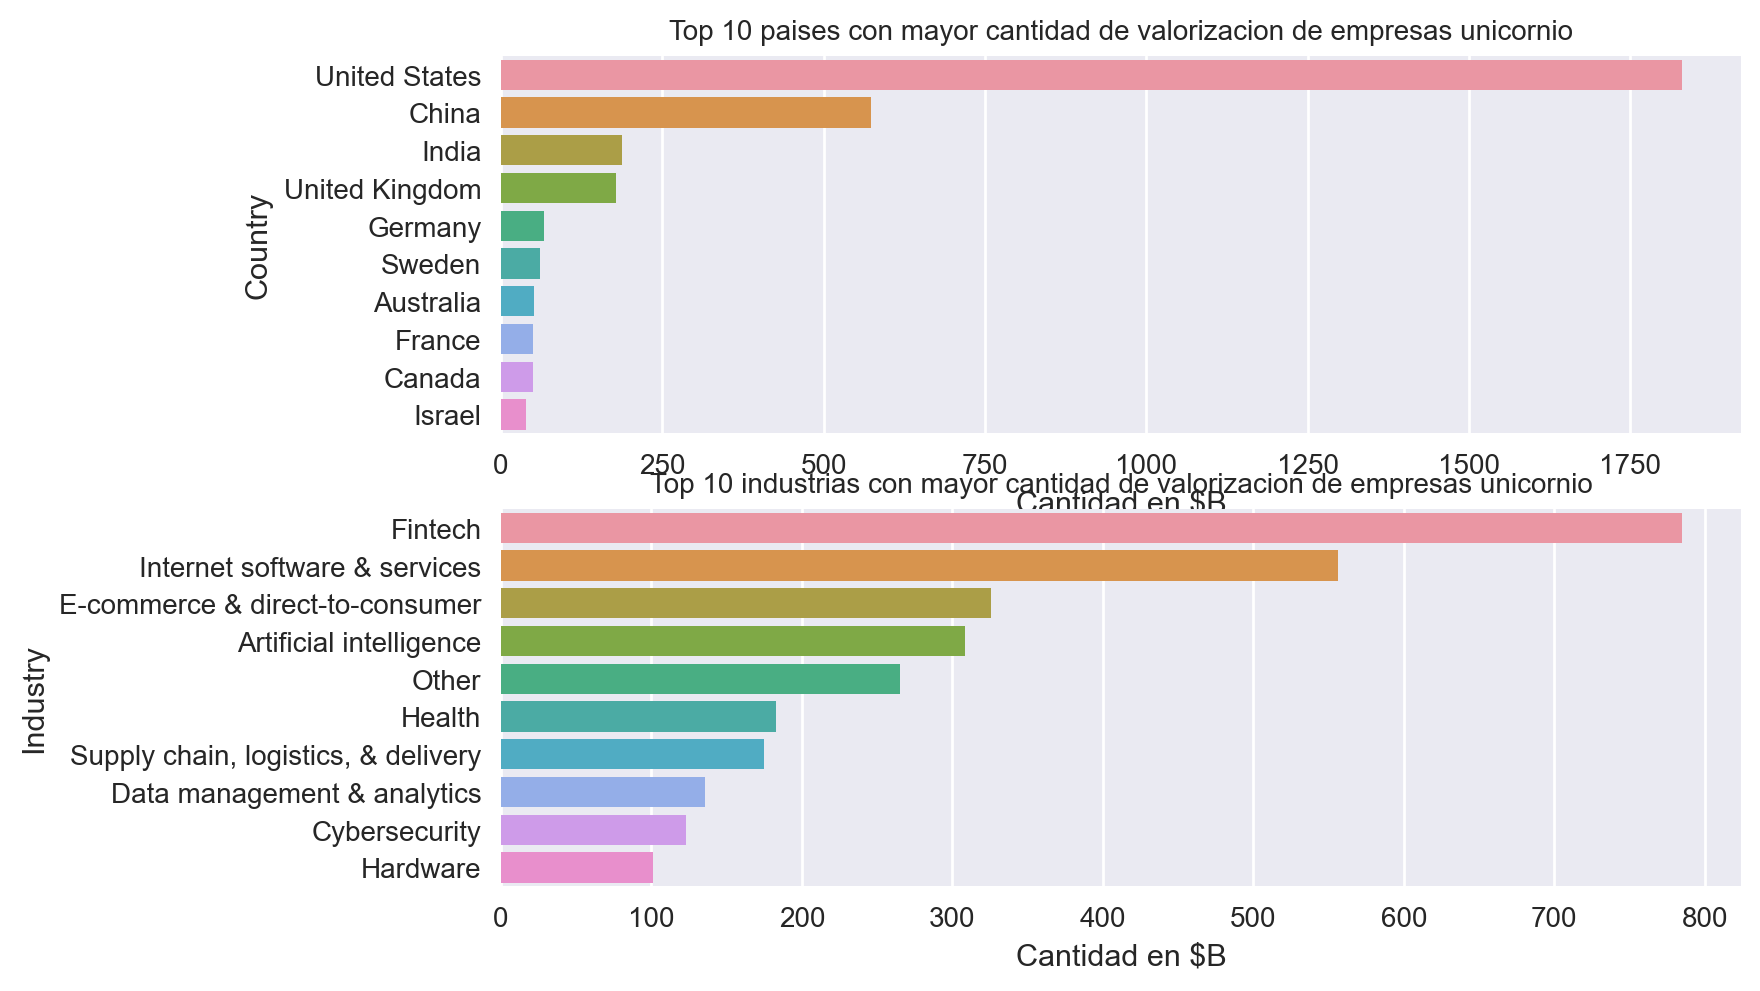

In [ ]:
fig = plt.figure(dpi=200)
val=fig.add_subplot(2,1,1)
val=sns.barplot(x=data_unicornio.groupby('Country')['Valuation ($B)'].sum().sort_values(ascending=False).head(10).values,y=data_unicornio.groupby('Country')['Valuation ($B)'].sum().sort_values(ascending=False).head(10).index)
val.set_xlabel('Cantidad en $B')
val.set_title('Top 10 paises con mayor cantidad de valorizacion de empresas unicornio',fontsize=10)

val2=fig.add_subplot(2,1,2)
val2=sns.barplot(x=data_unicornio.groupby('Industry')['Valuation ($B)'].sum().sort_values(ascending=False).head(10).values,y=data_unicornio.groupby('Industry')['Valuation ($B)'].sum().sort_values(ascending=False).head(10).index)
val2.set_xlabel('Cantidad en $B')
val2.set_title('Top 10 industrias con mayor cantidad de valorizacion de empresas unicornio',fontsize=10)

fig.tight_layout

Empresas que han recaudado mayor cantidad de dinero

In [ ]:
data_unicornio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Company            1037 non-null   object        
 1   Valuation ($B)     1037 non-null   float64       
 2   Date Joined        1037 non-null   datetime64[ns]
 3   Country            1037 non-null   object        
 4   City               1037 non-null   object        
 5   Industry           1037 non-null   object        
 6   Select Inverstors  1037 non-null   object        
 7   Founded Year       1037 non-null   object        
 8   Total Raised       1037 non-null   object        
 9   Financial Stage    1037 non-null   object        
 10  Investors Count    1037 non-null   int64         
 11  Deal Terms         1037 non-null   int64         
 12  Portfolio Exits    1037 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(8)
memory us

In [ ]:
nuevo_TR=[]
for i in data_unicornio['Total Raised']:
    i=i.replace('$',"")
    if "B" in i:
        i=i.replace("B","")
        i=pd.to_numeric(i)
        x=i*10**12
        nuevo_TR.append(x)
    elif 'M' in i:
        i=i.replace("M","")
        i=pd.to_numeric(i)
        x=i*10**6
        nuevo_TR.append(x)
    elif 'K' in i:
        i=i.replace("K","")
        i=pd.to_numeric(i)
        x=i*10**3
        nuevo_TR.append(x)
    else:
        i=i.replace("None","0")
        i=pd.to_numeric(i)
        nuevo_TR.append(i)
data_unicornio['nuevo tr']=nuevo_TR


In [ ]:
data_unicornio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Company            1037 non-null   object        
 1   Valuation ($B)     1037 non-null   float64       
 2   Date Joined        1037 non-null   datetime64[ns]
 3   Country            1037 non-null   object        
 4   City               1037 non-null   object        
 5   Industry           1037 non-null   object        
 6   Select Inverstors  1037 non-null   object        
 7   Founded Year       1037 non-null   object        
 8   Total Raised       1037 non-null   object        
 9   Financial Stage    1037 non-null   object        
 10  Investors Count    1037 non-null   int64         
 11  Deal Terms         1037 non-null   int64         
 12  Portfolio Exits    1037 non-null   int64         
 13  nuevo tr           1037 non-null   float64       
dtypes: datet

In [ ]:
Empresas=data_unicornio.groupby('Company')['nuevo tr'].sum().sort_values(ascending=False)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Bytedance'),
  Text(1, 0, 'SpaceX'),
  Text(2, 0, 'Global Switch'),
  Text(3, 0, 'Northvolt'),
  Text(4, 0, 'WM Motor'),
  Text(5, 0, "BYJU's"),
  Text(6, 0, 'Xingsheng Selected'),
  Text(7, 0, 'J&T Express'),
  Text(8, 0, 'Epic Games'),
  Text(9, 0, 'Chehaoduo')])

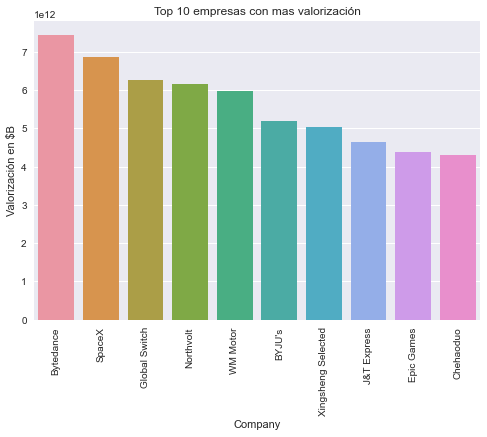

In [ ]:
fig=sns.barplot(x=Empresas.head(10).index,y=Empresas.head(10).values)
fig.set_xlabel('Company')
fig.set_ylabel('Valorización en $B')
fig.set_title('Top 10 empresas con mas valorización')
plt.xticks(rotation=90)


Concentración de valorización por cantidad de inversores

In [ ]:
fig = px.scatter(data_unicornio, x='Investors Count',
                 y='Valuation ($B)'
                )
fig.update_layout(showlegend=True,title_text='Valorización vs cantidad de inversores por empresa')
fig.show()

---
Generando a una nueva columna de valuation
sobre 500 hiper unicornio
menor a esto unicornio
Metricas predicted con las categorias creadas
metricas con las dos columnas

Creando la nueva columna

In [ ]:
data_unicornio.describe()

,Valuation ($B),Investors Count,Deal Terms,Portfolio Exits,nuevo tr
count,1037.000000,1037.000000,1037.000000,1037.000000,1.037000e+03
mean,3.292083,14.418515,3.006750,0.063645,2.287362e+11
std,7.309781,9.951832,2.189602,0.328503,7.919199e+11
min,1.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,1.080000,8.000000,1.000000,0.000000,2.173000e+08
50%,1.600000,13.000000,3.000000,0.000000,3.686000e+08
75%,3.100000,19.000000,4.000000,0.000000,6.283000e+08
max,140.000000,91.000000,19.000000,5.000000,7.440000e+12


In [ ]:
Categoria=[]
for i in data_unicornio['Valuation ($B)']:
    if i>50:
        Categoria.append('Hiper Unicornios')
    elif i<=50:
        Categoria.append('Unicornio')
data_unicornio['Categoria']=Categoria

In [ ]:
data_unicornio

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits,nuevo tr,Categoria
0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2012,$7.44B,IPO,28,8,5,7.440000e+12,Hiper Unicornios
1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002,$6.874B,None,29,12,0,6.874000e+12,Hiper Unicornios
2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2010,$2.901B,Asset,39,12,1,2.901000e+12,Hiper Unicornios
3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2005,$3.472B,Acquired,56,13,1,3.472000e+12,Unicornio
4,Epic Games,42.0,2018-10-26,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",1991,$4.377B,Acquired,25,5,2,4.377000e+12,Unicornio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,Timescale,1.0,2022-02-22,United States,New York,Internet software & services,"New Enterprise Associates, Benchmark, Two Sigm...",2015,$181.06M,None,7,2,0,1.810600e+08,Unicornio
1033,Scalapay,1.0,2022-02-23,Italy,Milan,Fintech,"Fasanara Capital, Tiger Global Management, Bal...",2019,$700M,None,10,2,0,7.000000e+08,Unicornio
1034,Omada Health,1.0,2022-02-23,United States,San Francisco,Health,"U.S. Venture Partners, dRx Capital, Andreessen...",2011,$449.72M,None,30,6,0,4.497200e+08,Unicornio
1035,BlueVoyant,1.0,2022-02-23,United States,New York,Cybersecurity,"8VC, Liberty Strategic Capital, Eden Global Pa...",2017,$525.5M,None,6,2,0,5.255000e+08,Unicornio


Creando columna predicted

In [ ]:
c=[]
import random
lista = ["Hiper Unicornios", "Unicornio"]
for i in range(0, len(data_unicornio["Valuation ($B)"])):
    x = random.choice(lista)
    c.append(x)
data_unicornio['Prediction']=c

In [ ]:
data_unicornio

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits,nuevo tr,Categoria,Prediction
0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2012,$7.44B,IPO,28,8,5,7.440000e+12,Hiper Unicornios,Hiper Unicornios
1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002,$6.874B,None,29,12,0,6.874000e+12,Hiper Unicornios,Hiper Unicornios
2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2010,$2.901B,Asset,39,12,1,2.901000e+12,Hiper Unicornios,Hiper Unicornios
3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2005,$3.472B,Acquired,56,13,1,3.472000e+12,Unicornio,Hiper Unicornios
4,Epic Games,42.0,2018-10-26,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",1991,$4.377B,Acquired,25,5,2,4.377000e+12,Unicornio,Unicornio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,Timescale,1.0,2022-02-22,United States,New York,Internet software & services,"New Enterprise Associates, Benchmark, Two Sigm...",2015,$181.06M,None,7,2,0,1.810600e+08,Unicornio,Unicornio
1033,Scalapay,1.0,2022-02-23,Italy,Milan,Fintech,"Fasanara Capital, Tiger Global Management, Bal...",2019,$700M,None,10,2,0,7.000000e+08,Unicornio,Unicornio
1034,Omada Health,1.0,2022-02-23,United States,San Francisco,Health,"U.S. Venture Partners, dRx Capital, Andreessen...",2011,$449.72M,None,30,6,0,4.497200e+08,Unicornio,Unicornio
1035,BlueVoyant,1.0,2022-02-23,United States,New York,Cybersecurity,"8VC, Liberty Strategic Capital, Eden Global Pa...",2017,$525.5M,None,6,2,0,5.255000e+08,Unicornio,Unicornio


Generando matriz de confusion

In [ ]:
from sklearn import metrics

In [ ]:
cm = metrics.confusion_matrix(data_unicornio['Categoria'],data_unicornio['Prediction'])

In [ ]:
cm.ravel()

array([  3,   0, 504, 530])

In [ ]:
tn, fp, fn, tp = cm.ravel()

In [ ]:
print(f'la cantidad de verdaderos positivos es: {tp}\n la cantidad de verdaderos negativos es: {tn}\n la cantidad de falsos positivos es: {fp}\n la cantidad de falsos negativos es: {fn} ')

la cantidad de verdaderos positivos es: 530
 la cantidad de verdaderos negativos es: 3
 la cantidad de falsos positivos es: 0
 la cantidad de falsos negativos es: 504 


Muy sesgada la clasifición, o clasifica bien o clasifica muy mal

In [ ]:
sensitivity = tp/ (tp + fn)
specificity = tn / (tn + fp)
precision=tp/(tp+fp)
type_one_error = 1 - specificity
type_two_error = 1 - sensitivity
print('Sensitivity: {:.3f}'.format(sensitivity))
print('Specificity: {:.3f}'.format(specificity))
print('Precisión: {:.3f}'.format(precision))
print('Type 1 Error Rate: {:.3f}'.format(type_one_error))
print('Type 2 Error Rate: {:.3f}'.format(type_two_error))

Sensitivity: 0.513
Specificity: 1.000
Precisión: 1.000
Type 1 Error Rate: 0.000
Type 2 Error Rate: 0.487


Claramente generó una precision muy alta pero esto esta mal debido a que la tasa de error tipo 2 es muy alta, que indica lo que se creia desde antes, o clasifica bien o clasifica mal